In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_CSV//AL30_COMPLETE_TASAS.csv")

In [3]:
data=df

<Axes: >

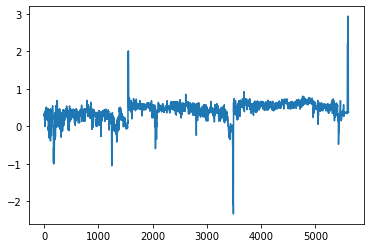

In [4]:
data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"].plot()

**FALTA GENERAR DIFERENCIA ENTRE COLOCAR TO, COLOCAR T+2, TOMAR T0, TOMART+2  Y TASA**

In [6]:
data["SPREAD_COLOCAR"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_TOMAR"] = data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) 

data["SPREAD_CENTRADO_TOMAR"] = data["SPREAD_TOMAR"] - data["SPREAD_TOMAR"].mean()
data["SPREAD_CENTRADO_COLOCAR"] = data["SPREAD_COLOCAR"] - data["SPREAD_COLOCAR"].mean()


data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_CENTRADO_COLOCAR","SPREAD_CENTRADO_TOMAR"]]
data_general["POSITION"] = 0

current_state = 0

threshold_closing = 0.001
threshold_arbitrage=0
lista=[]


# 1 colocar t0 y tomar t+2
# -1 tomar t0 y colocar t+2

for index, row in data_general.iterrows():
    if row["SPREAD_CENTRADO_COLOCAR"] < threshold_arbitrage and row["SPREAD_CENTRADO_TOMAR"] > threshold_arbitrage and current_state != 0:
        current_state = 0
        data_general.at[index, "POSITION"] = 0
    
    elif row["SPREAD_CENTRADO_COLOCAR"] > threshold_arbitrage and row["SPREAD_CENTRADO_TOMAR"] > threshold_arbitrage and current_state != 1:
        lista.append(row["SPREAD_CENTRADO_COLOCAR"])
        current_state = 1
        data_general.at[index, "POSITION"] = 1
        
    elif row["SPREAD_CENTRADO_COLOCAR"] < threshold_arbitrage and row["SPREAD_CENTRADO_TOMAR"] < threshold_arbitrage and current_state != -1:
        current_state = -1
        data_general.at[index, "POSITION"] = -1
        
    elif row["SPREAD_CENTRADO_COLOCAR"] > threshold_arbitrage and row["SPREAD_CENTRADO_TOMAR"] < threshold_arbitrage:
        
        if abs(row["SPREAD_CENTRADO_COLOCAR"]) > abs(row["SPREAD_CENTRADO_TOMAR"]) and current_state != 1:
            current_state = 1
            data_general.at[index, "POSITION"] = 1
            
        elif abs(row["SPREAD_CENTRADO_COLOCAR"]) < abs(row["SPREAD_CENTRADO_TOMAR"]) and current_state != -1:
            current_state = -1
            data_general.at[index, "POSITION"] = -1
            
        else:
            current_state = 0
            data_general.at[index, "POSITION"] = 0
     
    elif abs(row["SPREAD_CENTRADO_COLOCAR"]) <= threshold_closing and abs(row["SPREAD_CENTRADO_TOMAR"]) <= threshold_closing:
        current_state = 0
        data_general.at[index, "POSITION"] = 0
    else:
        current_state=0
        data_general.at[index, "POSITION"] = 0

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_81426/1363374303.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_general["POSITION"] = 0


In [11]:
position_counts = data_general["POSITION"].value_counts()
count_minus1 = position_counts.get(-1, 0)
count_0 = position_counts.get(0, 0)
count_1 = position_counts.get(1, 0)
print(f"Count of -1: {count_minus1}")
print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


Count of -1: 1100
Count of 0: 2866
Count of 1: 1644


In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
import numpy as np
from FUNCIONES_TASAS import *

In [14]:
df=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_DATOS/BASES_DE_DATOS/AL30_COMPLETE_TASAS.csv")

In [15]:
contar_comprart0_vendert2=0
contar_vender0_comprar_t2=0

data=df
data["SPREAD_COMPRAR_T0"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COMPRAR_T2"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_VENDER_T0"] = data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) 
data["SPREAD_VENDER_T2"] = data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) 


data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COMPRAR_T0","SPREAD_COMPRAR_T2","SPREAD_VENDER_T0","SPREAD_VENDER_T2"]]

data_general["POSITION_COMPRAR_T0"] = 0
data_general["POSITION_VENDER_T0"] = 0
data_general["POSITION_COMPRAR_T2"] = 0
data_general["POSITION_VENDER_T2"] = 0

current_state_comprar_t0_vender_t2 = 0
current_state_vender_t0_comprar_t0 = 0


threshold_closing = 0.001
threshold_arbitrage=0
lista=[]

for index, row in data_general.iterrows():
    
    # CASO NO PASA NADA
    if row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T0"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        continue
        
    # CASOS EN EL QUE SOLO UNO PASA ALGUN THRESHOLD GANADOR 
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 1
        data_general.at[index, "POSITION_VENDER_T0"] = 0
        data_general.at[index, "POSITION_COMPRAR_T2"] = 0
        data_general.at[index, "POSITION_VENDER_T2"] = -1
        contar_comprart0_vendert2+=1
        
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 0
        data_general.at[index, "POSITION_VENDER_T0"] = -1
        data_general.at[index, "POSITION_COMPRAR_T2"] = 1
        data_general.at[index, "POSITION_VENDER_T2"] = 0
        contar_vender0_comprar_t2+=1
        
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage :
        data_general.at[index, "POSITION_COMPRAR_T0"] = 0
        data_general.at[index, "POSITION_VENDER_T0"] = -1
        data_general.at[index, "POSITION_COMPRAR_T2"] = 1
        data_general.at[index, "POSITION_VENDER_T2"] = 0
        contar_vender0_comprar_t2+=1
        
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 1
        data_general.at[index, "POSITION_VENDER_T0"] = 0
        data_general.at[index, "POSITION_COMPRAR_T2"] =0
        data_general.at[index, "POSITION_VENDER_T2"] = -1
        contar_comprart0_vendert2+=1
        
    

    #CASOS EN EL QUE MAS DE 2 PASA THRESHOLD GANADOR
    
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_comprart0_vendert2+=1
                 
            
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        if abs(row["SPREAD_VENDER_T0"]) > abs(row["SPREAD_VENDER_T2"]) or abs(row["SPREAD_VENDER_T0"]) == abs(row["SPREAD_VENDER_T2"]):
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_comprart0_vendert2+=1
            
        else:
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
            
    # CASOS EN EL QUE 3 SE CUMPLEN, CUAL ELEGIMOS
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] > threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_comprart0_vendert2+=1
            
            
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] > threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_comprart0_vendert2+=1
            
            
    elif row["SPREAD_COMPRAR_T0"] < threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_T0"]) == abs(row["SPREAD_COMPRAR_T2"]):
            
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_comprart0_vendert2+=1
            
    
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] < threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        if abs(row["SPREAD_COMPRAR_T0"]) > abs(row["SPREAD_COMPRAR_T2"]) or abs(row["SPREAD_COMPRAR_TO"]) == abs(row["SPREAD_COMPRAR_T2"]):
            
            data_general.at[index, "POSITION_COMPRAR_T0"] = 1
            data_general.at[index, "POSITION_VENDER_T0"] = 0
            data_general.at[index, "POSITION_COMPRAR_T2"] = 0
            data_general.at[index, "POSITION_VENDER_T2"] = -1
            contar_comprart0_vendert2+=1
            
        else:
            data_general.at[index, "POSITION_COMPRAR_T0"] = 0
            data_general.at[index, "POSITION_VENDER_T0"] = -1
            data_general.at[index, "POSITION_COMPRAR_T2"] = 1
            data_general.at[index, "POSITION_VENDER_T2"] = 0
            contar_comprart0_vendert2+=1
            
    
            
    # CASO EN EL QUE TODOS PASAN Y SON BUENA OPCION DE TRADE        
    elif row["SPREAD_COMPRAR_T0"] > threshold_arbitrage and row["SPREAD_COMPRAR_T2"] > threshold_arbitrage  and row["SPREAD_VENDER_T0"] < threshold_arbitrage and row["SPREAD_VENDER_T2"] < threshold_arbitrage:
        
        max_comprar = max(abs(row["SPREAD_COMPRAR_T0"]), abs(row["SPREAD_COMPRAR_T2"]))
        max_vender = max(abs(row["SPREAD_VENDER_T0"]), abs(row["SPREAD_VENDER_T2"]))
            
        if max_comprar>max_vender:
            #comprar t0 y vender t2
            if max_comprar==abs(row["SPREAD_COMPRAR_TO"]):
                data_general.at[index, "POSITION_COMPRAR_T0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1
                contar_comprart0_vendert2+=1
                
            elif max_comprar==abs(row["SPREAD_COMPRAR_T2"]):
                #vender t0 y comprar t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 0
                data_general.at[index, "POSITION_VENDER_T0"] = -1
                data_general.at[index, "POSITION_COMPRAR_T2"] = 1
                data_general.at[index, "POSITION_VENDER_T2"] = 0
                contar_comprart0_vendert2+=1
                
        elif max_comprar<max_vender:
            if max_vender==abs(row["SPREAD_VENDER_T0"]):
                #vender t0 y comprar t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 0
                data_general.at[index, "POSITION_VENDER_T0"] = -1
                data_general.at[index, "POSITION_COMPRAR_T2"] = 1
                data_general.at[index, "POSITION_VENDER_T2"] = 0
                contar_comprart0_vendert2+=1
                
            elif max_vender==abs(row["SPREAD_VENDER_T2"]):
                 #comprar t0 y vender t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1
                contar_comprart0_vendert2+=1
                
        elif max_comprar==max_vender:
    
            if max_vender==abs(row["SPREAD_VENDER_T0"]) and max_comprar==abs(row["SPREAD_COMPRAR_T2"]):
                #vender t0 comprar t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 0
                data_general.at[index, "POSITION_VENDER_T0"] = -1
                data_general.at[index, "POSITION_COMPRAR_T2"] = 1
                data_general.at[index, "POSITION_VENDER_T2"] = 0
                contar_comprart0_vendert2+=1
            elif max_vender==abs(row["SPREAD_VENDER_T2"]) and max_comprar==abs(row["SPREAD_COMPRAR_T0"]):
                #comprar t0 y vender t2
                data_general.at[index, "POSITION_COMPRAR_T0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1 
                contar_comprart0_vendert2+=1
            else:
                #comprar t0 y vender t2
                data_general.at[index, "POSITION_COMPRAR_TO0"] = 1
                data_general.at[index, "POSITION_VENDER_T0"] = 0
                data_general.at[index, "POSITION_COMPRAR_T2"] = 0
                data_general.at[index, "POSITION_VENDER_T2"] = -1
                contar_comprart0_vendert2+=1
    else:
        data_general.at[index, "POSITION_COMPRAR_T0"] = 0
        data_general.at[index, "POSITION_VENDER_T0"] = 0
        data_general.at[index, "POSITION_COMPRAR_T2"] = 0
        data_general.at[index, "POSITION_VENDER_T2"] = 0

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_81240/3193032298.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_general["POSITION_COMPRAR_T0"] = 0
/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_81240/3193032298.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_general["POSITION_VENDER_T0"] = 0
/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_81240/3193032298.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [16]:
contar_comprart0_vendert2

5383

In [17]:
contar_vender0_comprar_t2

30